In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [200]:
df = pd.read_excel('PVA97NK_Final.xlsx')
df.to_csv('data.csv',index=False)

In [201]:
df = pd.read_csv('data.csv')
df.shape

(9686, 28)

In [202]:
df.head()

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0,14974,NaN,2,4,1,3,17.0,13.50,9.25,...,13,A,0,0,NaN,F,U,0,0,0
1,0,6294,NaN,1,8,0,3,20.0,20.00,15.88,...,24,A,0,23,67.0,F,U,186800,85,0
2,1,46110,4.0,6,41,3,20,6.0,5.17,3.73,...,22,S,1,0,NaN,M,U,87600,36,38750
3,1,185937,10.0,3,12,3,8,10.0,8.67,8.50,...,16,E,1,0,NaN,M,U,139200,27,38942
4,0,29637,NaN,1,1,1,1,20.0,20.00,20.00,...,6,F,0,35,53.0,M,U,168100,37,71509


In [203]:
df1 = df.copy(deep=True)
df1.head()

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0,14974,NaN,2,4,1,3,17.0,13.50,9.25,...,13,A,0,0,NaN,F,U,0,0,0
1,0,6294,NaN,1,8,0,3,20.0,20.00,15.88,...,24,A,0,23,67.0,F,U,186800,85,0
2,1,46110,4.0,6,41,3,20,6.0,5.17,3.73,...,22,S,1,0,NaN,M,U,87600,36,38750
3,1,185937,10.0,3,12,3,8,10.0,8.67,8.50,...,16,E,1,0,NaN,M,U,139200,27,38942
4,0,29637,NaN,1,1,1,1,20.0,20.00,20.00,...,6,F,0,35,53.0,M,U,168100,37,71509


In [204]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TargetB           9686 non-null   int64  
 1   ID                9686 non-null   int64  
 2   TargetD           4843 non-null   float64
 3   GiftCnt36         9686 non-null   int64  
 4   GiftCntAll        9686 non-null   int64  
 5   GiftCntCard36     9686 non-null   int64  
 6   GiftCntCardAll    9686 non-null   int64  
 7   GiftAvgLast       9686 non-null   float64
 8   GiftAvg36         9686 non-null   float64
 9   GiftAvgAll        9686 non-null   float64
 10  GiftAvgCard36     7906 non-null   float64
 11  GiftTimeLast      9686 non-null   int64  
 12  GiftTimeFirst     9686 non-null   int64  
 13  PromCnt12         9686 non-null   int64  
 14  PromCnt36         9686 non-null   int64  
 15  PromCntAll        9686 non-null   int64  
 16  PromCntCard12     9686 non-null   int64  


In [205]:
df1.nunique()

TargetB                2
ID                  9686
TargetD               70
GiftCnt36             16
GiftCntAll            69
GiftCntCard36         10
GiftCntCardAll        31
GiftAvgLast           90
GiftAvg36            654
GiftAvgAll          1584
GiftAvgCard36        399
GiftTimeLast          24
GiftTimeFirst        136
PromCnt12             49
PromCnt36             68
PromCntAll           140
PromCntCard12         17
PromCntCard36         27
PromCntCardAll        51
StatusCat96NK          6
StatusCatStarAll       2
DemCluster            54
DemAge                79
DemGender              3
DemHomeOwner           2
DemMedHomeValue     2533
DemPctVeterans        79
DemMedIncome        4463
dtype: int64

In [206]:
df1.drop(['ID'],axis=1,inplace=True)

In [207]:
df1.head(3)

,TargetB,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0,NaN,2,4,1,3,17.0,13.50,9.25,17.0,...,13,A,0,0,NaN,F,U,0,0,0
1,0,NaN,1,8,0,3,20.0,20.00,15.88,NaN,...,24,A,0,23,67.0,F,U,186800,85,0
2,1,4.0,6,41,3,20,6.0,5.17,3.73,5.0,...,22,S,1,0,NaN,M,U,87600,36,38750


In [208]:
df1.columns

Index(['TargetB', 'TargetD', 'GiftCnt36', 'GiftCntAll', 'GiftCntCard36',
       'GiftCntCardAll', 'GiftAvgLast', 'GiftAvg36', 'GiftAvgAll',
       'GiftAvgCard36', 'GiftTimeLast', 'GiftTimeFirst', 'PromCnt12',
       'PromCnt36', 'PromCntAll', 'PromCntCard12', 'PromCntCard36',
       'PromCntCardAll', 'StatusCat96NK', 'StatusCatStarAll', 'DemCluster',
       'DemAge', 'DemGender', 'DemHomeOwner', 'DemMedHomeValue',
       'DemPctVeterans', 'DemMedIncome'],
      dtype='object')

In [209]:
a = ['a','b']
a={'a':1,'b':2}

In [210]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)


There are 3 categorical variables

The categorical variables : ['StatusCat96NK', 'DemGender', 'DemHomeOwner']


In [211]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 24 numerical variables

The numerical variables : ['TargetB', 'TargetD', 'GiftCnt36', 'GiftCntAll', 'GiftCntCard36', 'GiftCntCardAll', 'GiftAvgLast', 'GiftAvg36', 'GiftAvgAll', 'GiftAvgCard36', 'GiftTimeLast', 'GiftTimeFirst', 'PromCnt12', 'PromCnt36', 'PromCntAll', 'PromCntCard12', 'PromCntCard36', 'PromCntCardAll', 'StatusCatStarAll', 'DemCluster', 'DemAge', 'DemMedHomeValue', 'DemPctVeterans', 'DemMedIncome']


In [212]:
df1.TargetB.value_counts()

0    4843
1    4843
Name: TargetB, dtype: int64

In [213]:
df1[numerical].describe(percentiles=[.25,.50,.75,.90,.95])

,TargetB,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,...,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemCluster,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome
count,9686.000000,4843.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,7906.000000,...,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,7279.000000,9686.000000,9686.000000,9686.000000
mean,0.500000,15.624344,3.205451,10.507640,1.856597,5.582490,16.017739,14.876203,12.489325,14.224431,...,48.483481,5.392009,11.954677,19.007124,0.540574,27.150320,59.150845,110986.299814,30.604274,40491.444249
std,0.500026,12.445137,2.133421,8.993401,1.595419,4.736894,12.041805,10.057007,9.209297,10.022710,...,23.061483,1.323648,4.571568,8.562193,0.498377,14.832665,16.516400,98670.855450,11.394988,28707.494146
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.330000,...,5.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,2.000000,4.000000,1.000000,2.000000,10.000000,9.600000,7.750000,8.670000,...,29.000000,5.000000,7.000000,12.000000,0.000000,14.000000,47.000000,52300.000000,25.000000,24464.000000
50%,0.500000,13.000000,3.000000,8.000000,1.000000,4.000000,15.000000,13.500000,10.710000,12.500000,...,48.000000,6.000000,13.000000,19.000000,1.000000,27.000000,60.000000,76900.000000,31.000000,43100.000000
75%,1.000000,20.000000,4.000000,15.000000,3.000000,8.000000,20.000000,18.500000,15.000000,18.000000,...,65.000000,6.000000,16.000000,26.000000,1.000000,40.000000,73.000000,128175.000000,37.000000,56876.000000
90%,1.000000,25.000000,6.000000,22.000000,4.000000,12.000000,25.000000,25.000000,20.000000,25.000000,...,76.000000,6.000000,17.000000,31.000000,1.000000,47.000000,80.000000,231400.000000,44.000000,73130.000000
95%,1.000000,32.000000,7.000000,28.000000,5.000000,15.000000,30.000000,27.500000,25.000000,26.000000,...,83.000000,6.750000,17.000000,32.000000,1.000000,49.000000,83.000000,327575.000000,48.000000,84675.500000
max,1.000000,200.000000,16.000000,91.000000,9.000000,41.000000,450.000000,260.000000,450.000000,260.000000,...,174.000000,17.000000,28.000000,56.000000,1.000000,53.000000,87.000000,600000.000000,85.000000,200001.000000


Missing Values

numericals

In [214]:
4843*2

9686

In [215]:
df1.shape

(9686, 27)

In [216]:
df1[numerical].isnull().sum()

TargetB                0
TargetD             4843
GiftCnt36              0
GiftCntAll             0
GiftCntCard36          0
GiftCntCardAll         0
GiftAvgLast            0
GiftAvg36              0
GiftAvgAll             0
GiftAvgCard36       1780
GiftTimeLast           0
GiftTimeFirst          0
PromCnt12              0
PromCnt36              0
PromCntAll             0
PromCntCard12          0
PromCntCard36          0
PromCntCardAll         0
StatusCatStarAll       0
DemCluster             0
DemAge              2407
DemMedHomeValue        0
DemPctVeterans         0
DemMedIncome           0
dtype: int64

array([[<AxesSubplot: title={'center': 'TargetB'}>,
        <AxesSubplot: title={'center': 'TargetD'}>,
        <AxesSubplot: title={'center': 'GiftCnt36'}>,
        <AxesSubplot: title={'center': 'GiftCntAll'}>,
        <AxesSubplot: title={'center': 'GiftCntCard36'}>],
       [<AxesSubplot: title={'center': 'GiftCntCardAll'}>,
        <AxesSubplot: title={'center': 'GiftAvgLast'}>,
        <AxesSubplot: title={'center': 'GiftAvg36'}>,
        <AxesSubplot: title={'center': 'GiftAvgAll'}>,
        <AxesSubplot: title={'center': 'GiftAvgCard36'}>],
       [<AxesSubplot: title={'center': 'GiftTimeLast'}>,
        <AxesSubplot: title={'center': 'GiftTimeFirst'}>,
        <AxesSubplot: title={'center': 'PromCnt12'}>,
        <AxesSubplot: title={'center': 'PromCnt36'}>,
        <AxesSubplot: title={'center': 'PromCntAll'}>],
       [<AxesSubplot: title={'center': 'PromCntCard12'}>,
        <AxesSubplot: title={'center': 'PromCntCard36'}>,
        <AxesSubplot: title={'center': 'PromCntCar

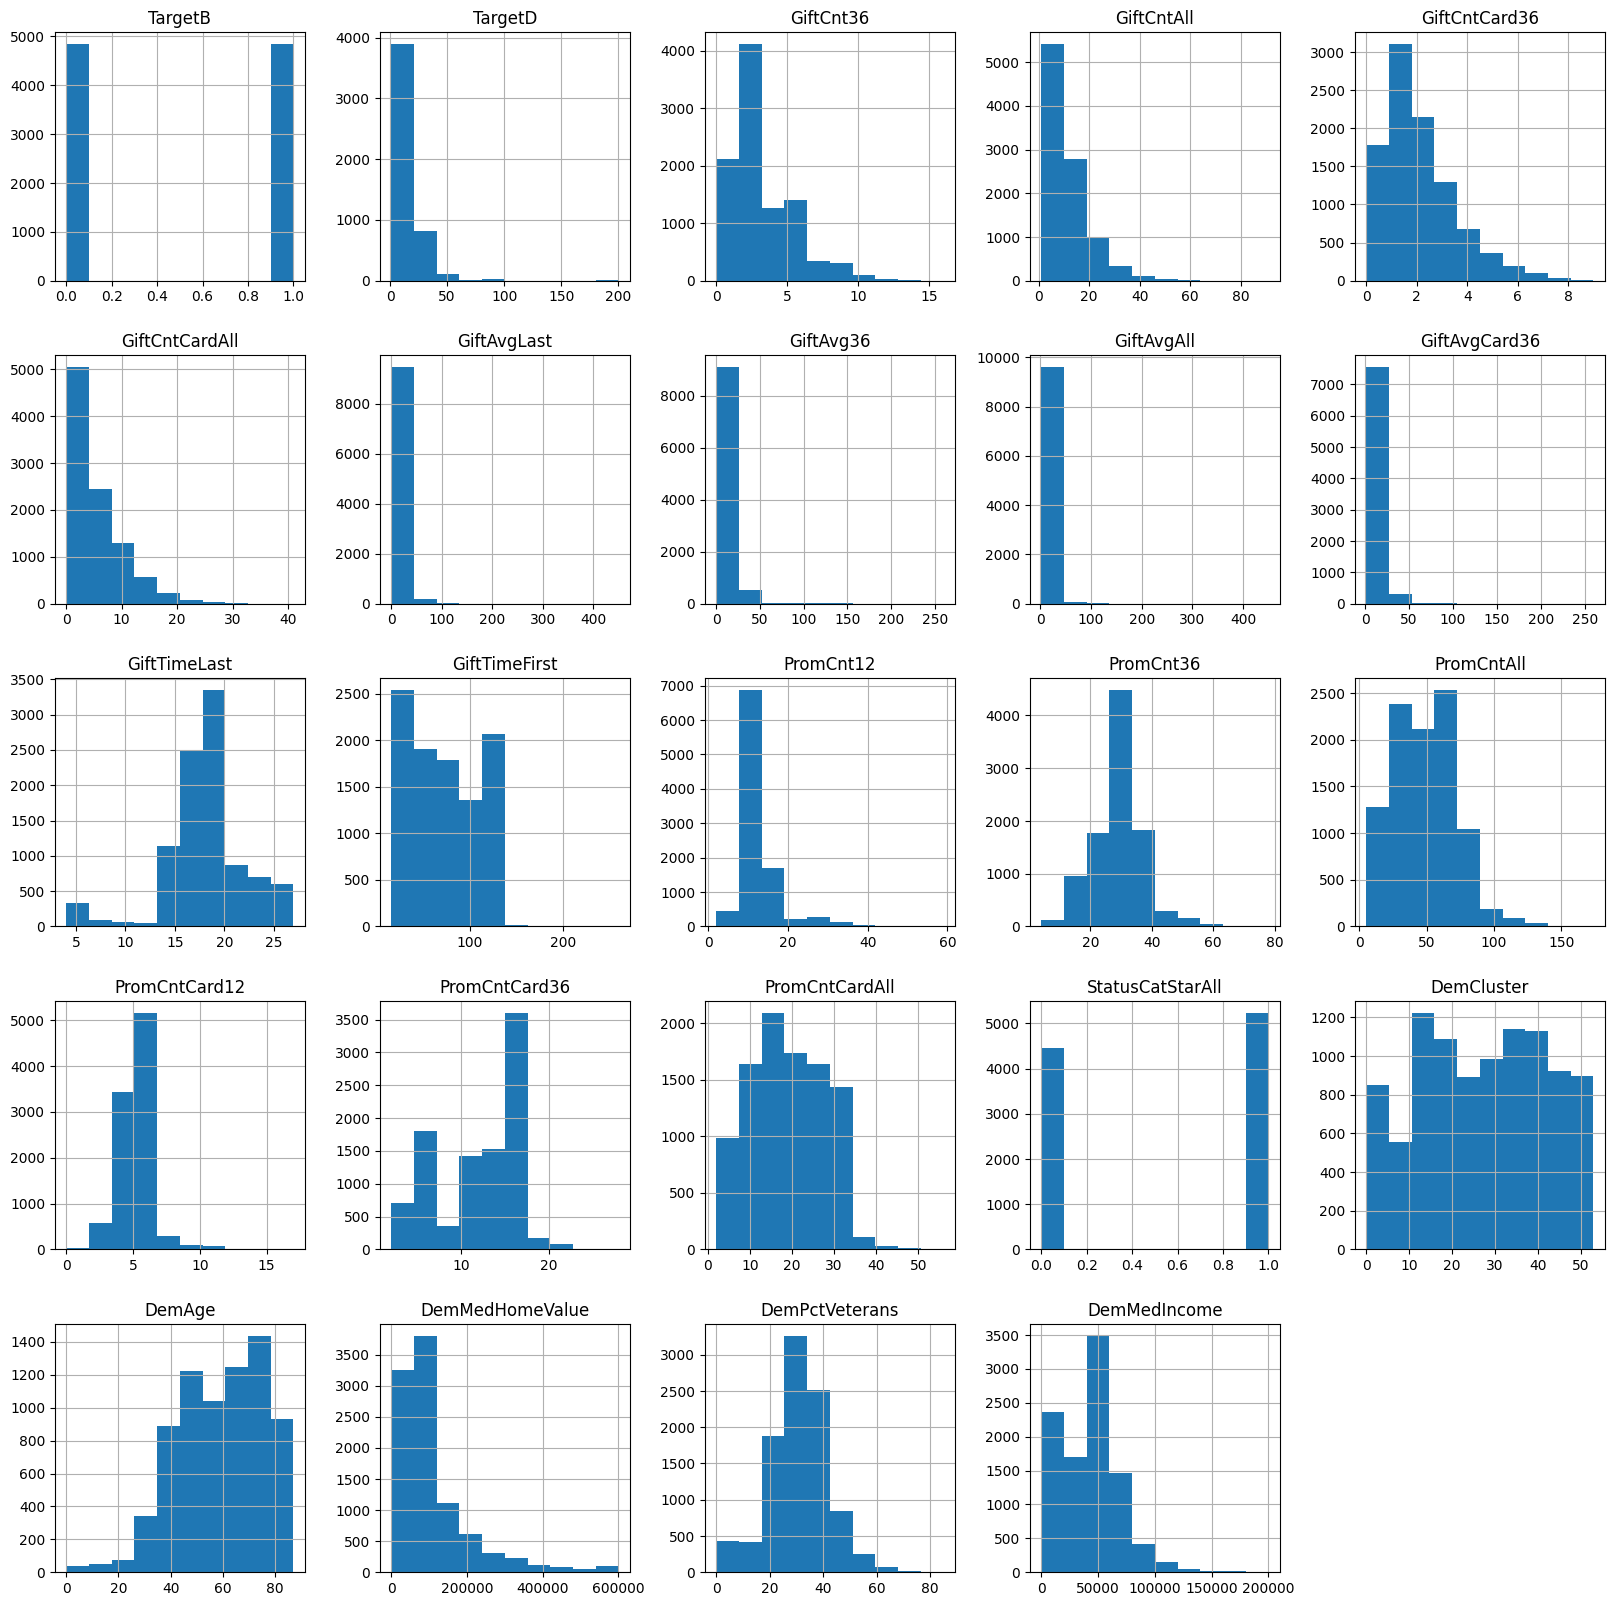

In [217]:
df1[numerical].hist(figsize=(20,20))

TargetD -> median

GiftAvgCard36 -> median

DemAge -> median

In [218]:
# df1[numerical].fillna(df1[numerical].median(),inplace=True)
df1.TargetD = df1.TargetD.fillna(df1.TargetD.median())
df1.GiftAvgCard36 = df1.GiftAvgCard36.fillna(df1.GiftAvgCard36.median())
df1.DemAge = df1.DemAge.fillna(df1.DemAge.median())

In [219]:
df1[numerical].isnull().values.any()

False

categorical

In [220]:
df1[categorical].isnull().values.any()

False

In [221]:
df1.isnull().values.any()

False

OA

In [222]:
df1.describe(percentiles=[0.25,.5,.75,.9,.95,.99])

,TargetB,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,...,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemCluster,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome
count,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,...,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000
mean,0.500000,14.312172,3.205451,10.507640,1.856597,5.582490,16.017739,14.876203,12.489325,13.907531,...,48.483481,5.392009,11.954677,19.007124,0.540574,27.150320,59.361862,110986.299814,30.604274,40491.444249
std,0.500026,8.896893,2.133421,8.993401,1.595419,4.736894,12.041805,10.057007,9.209297,9.079554,...,23.061483,1.323648,4.571568,8.562193,0.498377,14.832665,14.322348,98670.855450,11.394988,28707.494146
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.330000,...,5.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13.000000,2.000000,4.000000,1.000000,2.000000,10.000000,9.600000,7.750000,10.000000,...,29.000000,5.000000,7.000000,12.000000,0.000000,14.000000,51.000000,52300.000000,25.000000,24464.000000
50%,0.500000,13.000000,3.000000,8.000000,1.000000,4.000000,15.000000,13.500000,10.710000,12.500000,...,48.000000,6.000000,13.000000,19.000000,1.000000,27.000000,60.000000,76900.000000,31.000000,43100.000000
75%,1.000000,13.000000,4.000000,15.000000,3.000000,8.000000,20.000000,18.500000,15.000000,15.382500,...,65.000000,6.000000,16.000000,26.000000,1.000000,40.000000,69.000000,128175.000000,37.000000,56876.000000
90%,1.000000,20.000000,6.000000,22.000000,4.000000,12.000000,25.000000,25.000000,20.000000,22.500000,...,76.000000,6.000000,17.000000,31.000000,1.000000,47.000000,78.000000,231400.000000,44.000000,73130.000000
95%,1.000000,25.000000,7.000000,28.000000,5.000000,15.000000,30.000000,27.500000,25.000000,25.000000,...,83.000000,6.750000,17.000000,32.000000,1.000000,49.000000,82.000000,327575.000000,48.000000,84675.500000
99%,1.000000,50.000000,10.000000,42.000000,7.000000,21.000000,50.000000,50.000000,40.128000,50.000000,...,114.000000,11.000000,20.000000,36.000000,1.000000,53.000000,86.000000,539425.000000,59.000000,118256.000000


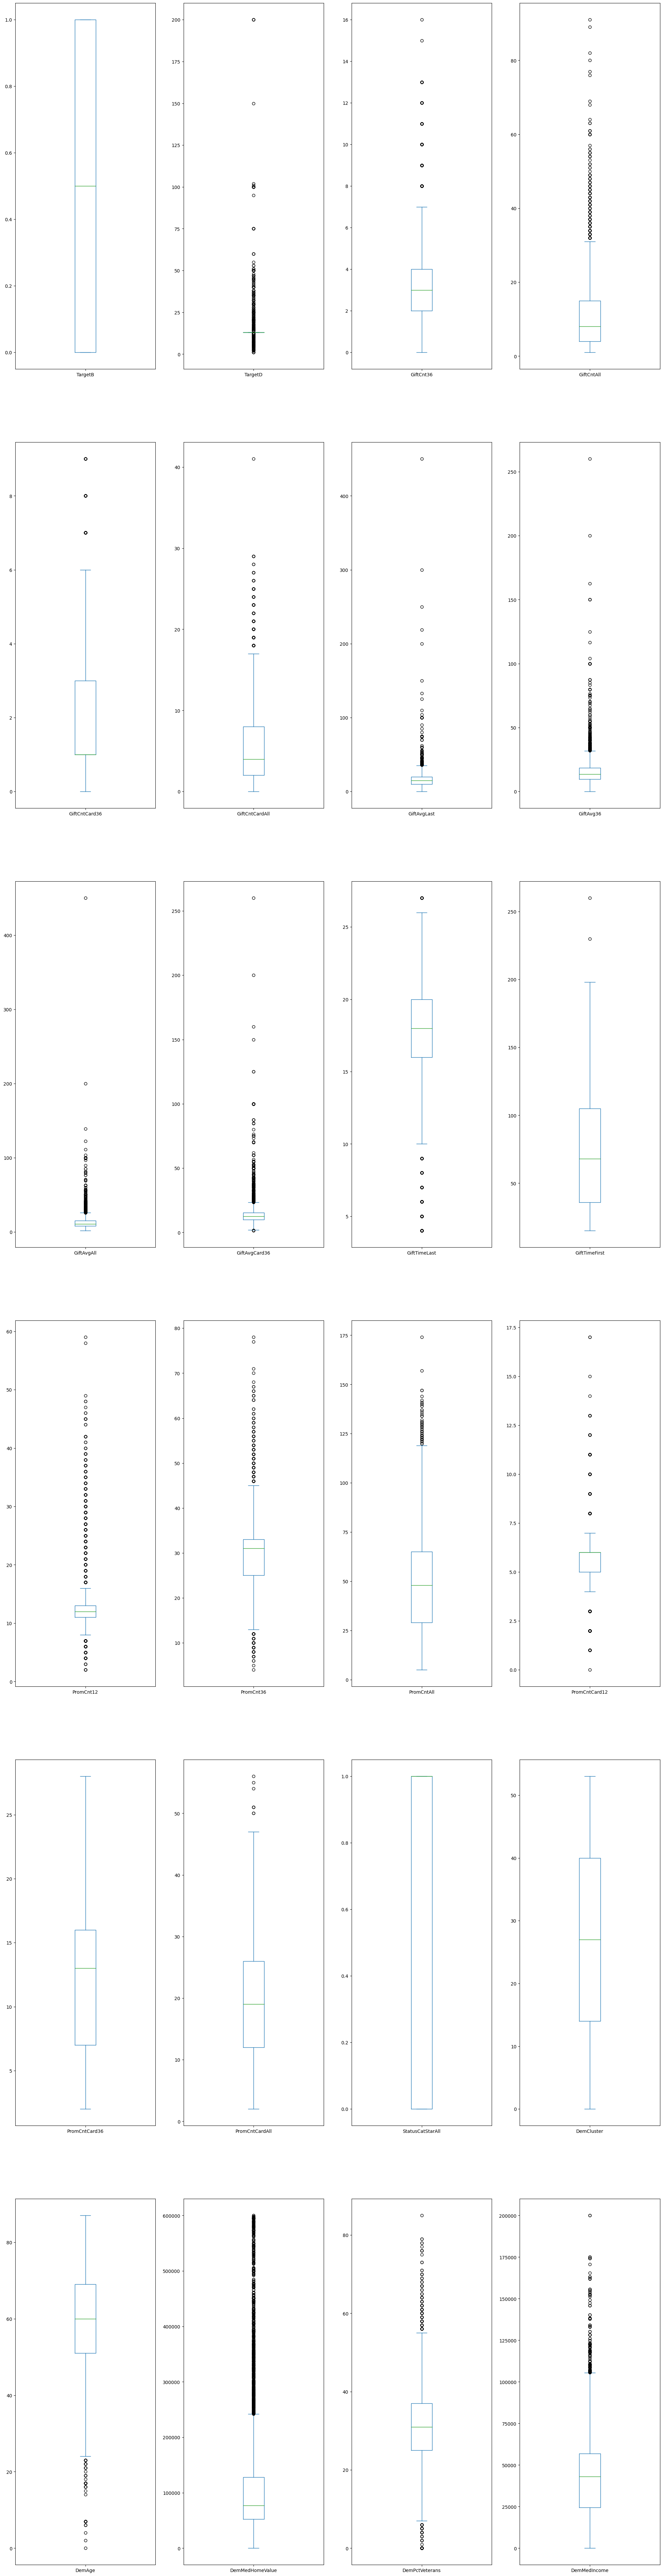

In [223]:
df1[numerical].plot(kind = "box",subplots = True,layout = (6,4),figsize=(25,100)) #Boxplot to check the outliers
plt.show()

In [224]:
df1.columns

Index(['TargetB', 'TargetD', 'GiftCnt36', 'GiftCntAll', 'GiftCntCard36',
       'GiftCntCardAll', 'GiftAvgLast', 'GiftAvg36', 'GiftAvgAll',
       'GiftAvgCard36', 'GiftTimeLast', 'GiftTimeFirst', 'PromCnt12',
       'PromCnt36', 'PromCntAll', 'PromCntCard12', 'PromCntCard36',
       'PromCntCardAll', 'StatusCat96NK', 'StatusCatStarAll', 'DemCluster',
       'DemAge', 'DemGender', 'DemHomeOwner', 'DemMedHomeValue',
       'DemPctVeterans', 'DemMedIncome'],
      dtype='object')

In [225]:
rem_list =['TargetD','GiftCnt36', 'GiftCntAll','GiftCntCard36',
       'GiftCntCardAll', 'GiftAvgLast', 'GiftAvg36','GiftAvgAll',
       'GiftAvgCard36', 'GiftTimeLast', 'GiftTimeFirst', 'PromCnt12',
       'PromCnt36', 'PromCntAll', 'PromCntCard12','PromCntCardAll','DemAge','DemMedHomeValue',
       'DemPctVeterans', 'DemMedIncome']

In [226]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [227]:
df3 = treat_outliers_all(df1 , rem_list)

In [228]:
df3.describe(percentiles=[0.25,.5,.75,.9,.95,.99])

,TargetB,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,...,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemCluster,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome
count,9686.000000,9686.0,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,...,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000
mean,0.500000,13.0,3.105307,10.220318,1.835226,5.484101,15.281110,14.264056,11.972846,13.077840,...,48.408115,5.382304,11.954677,19.002788,0.540574,27.150320,59.477080,99668.520287,30.745612,40124.390357
std,0.500026,0.0,1.860232,7.943251,1.526940,4.425125,7.454142,6.875345,5.695957,5.352183,...,22.798278,0.986006,4.571568,8.546432,0.498377,14.832665,13.980414,65318.652794,10.414136,27589.693378
min,0.000000,13.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.926250,...,5.000000,3.500000,2.000000,2.000000,0.000000,0.000000,24.000000,0.000000,7.000000,0.000000
25%,0.000000,13.0,2.000000,4.000000,1.000000,2.000000,10.000000,9.600000,7.750000,10.000000,...,29.000000,5.000000,7.000000,12.000000,0.000000,14.000000,51.000000,52300.000000,25.000000,24464.000000
50%,0.500000,13.0,3.000000,8.000000,1.000000,4.000000,15.000000,13.500000,10.710000,12.500000,...,48.000000,6.000000,13.000000,19.000000,1.000000,27.000000,60.000000,76900.000000,31.000000,43100.000000
75%,1.000000,13.0,4.000000,15.000000,3.000000,8.000000,20.000000,18.500000,15.000000,15.382500,...,65.000000,6.000000,16.000000,26.000000,1.000000,40.000000,69.000000,128175.000000,37.000000,56876.000000
90%,1.000000,13.0,6.000000,22.000000,4.000000,12.000000,25.000000,25.000000,20.000000,22.500000,...,76.000000,6.000000,17.000000,31.000000,1.000000,47.000000,78.000000,231400.000000,44.000000,73130.000000
95%,1.000000,13.0,7.000000,28.000000,5.000000,15.000000,30.000000,27.500000,25.000000,23.456250,...,83.000000,6.750000,17.000000,32.000000,1.000000,49.000000,82.000000,241987.500000,48.000000,84675.500000
99%,1.000000,13.0,7.000000,31.500000,6.000000,17.000000,35.000000,31.850000,25.875000,23.456250,...,114.000000,7.500000,20.000000,36.000000,1.000000,53.000000,86.000000,241987.500000,55.000000,105494.000000


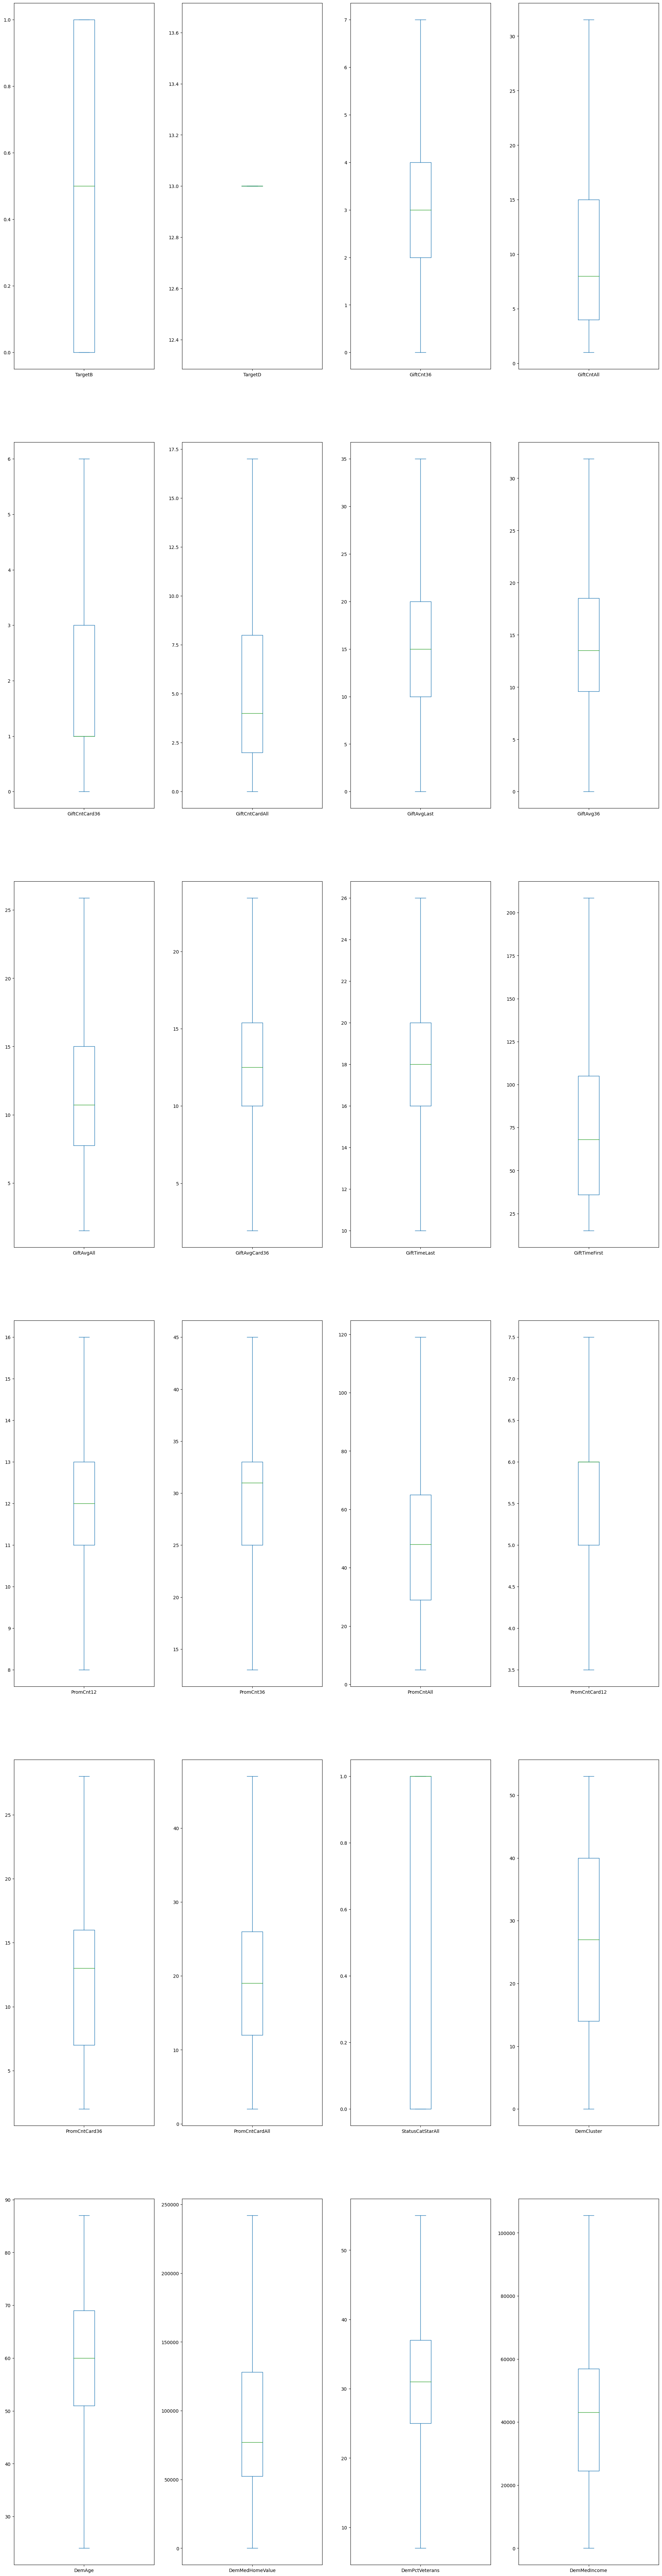

In [229]:
df3[numerical].plot(kind = "box",subplots = True,layout = (6,4),figsize=(25,100)) #Boxplot to check the outliers
plt.show()

In [230]:
df3.drop(['TargetD'],axis=1,inplace=True)

In [231]:
numerical.remove('TargetD')

Categorical variable Encoding

In [232]:
df3[categorical].head()

,StatusCat96NK,DemGender,DemHomeOwner
0,A,F,U
1,A,F,U
2,S,M,U
3,E,M,U
4,F,M,U


In [233]:
df3[categorical].nunique()

StatusCat96NK    6
DemGender        3
DemHomeOwner     2
dtype: int64

In [234]:
df3.shape

(9686, 26)

In [235]:
df3 = pd.get_dummies(data=df3,columns=categorical,drop_first=True)
df3.shape

(9686, 31)

In [236]:
31*31

961

Feature Engineering

In [237]:
df3.head()

,TargetB,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,...,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemGender_M,DemGender_U,DemHomeOwner_U
0,0,2,4.0,1,3,17.0,13.50,9.25,17.00,21,...,7,0,0,0,0,0,0,0,0,1
1,0,1,8.0,0,3,20.0,20.00,15.88,12.50,26,...,55,0,0,0,0,0,0,0,0,1
2,1,6,31.5,3,17,6.0,5.17,3.73,5.00,18,...,36,38750,0,0,0,0,1,1,0,1
3,1,3,12.0,3,8,10.0,8.67,8.50,8.67,10,...,27,38942,1,0,0,0,0,1,0,1
4,0,1,1.0,1,1,20.0,20.00,20.00,20.00,21,...,37,71509,0,1,0,0,0,1,0,1


In [238]:
X = df3.drop(['TargetB'],axis=1)
y = df3.TargetB

X.shape, y.shape

((9686, 30), (9686,))

In [239]:
X.dtypes

GiftCnt36             int64
GiftCntAll          float64
GiftCntCard36         int64
GiftCntCardAll        int64
GiftAvgLast         float64
GiftAvg36           float64
GiftAvgAll          float64
GiftAvgCard36       float64
GiftTimeLast          int64
GiftTimeFirst       float64
PromCnt12             int64
PromCnt36             int64
PromCntAll            int64
PromCntCard12       float64
PromCntCard36         int64
PromCntCardAll        int64
StatusCatStarAll      int64
DemCluster            int64
DemAge              float64
DemMedHomeValue     float64
DemPctVeterans        int64
DemMedIncome          int64
StatusCat96NK_E       uint8
StatusCat96NK_F       uint8
StatusCat96NK_L       uint8
StatusCat96NK_N       uint8
StatusCat96NK_S       uint8
DemGender_M           uint8
DemGender_U           uint8
DemHomeOwner_U        uint8
dtype: object

In [240]:
y.value_counts()

0    4843
1    4843
Name: TargetB, dtype: int64

In [241]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7748, 30), (1938, 30), (7748,), (1938,))

In [242]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

CATBOOST

In [243]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [244]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train_RF, y_train, 
         
        eval_set=(X_test_RF, y_test), 
        verbose=5
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

0:	learn: 0.6898220	test: 0.6905202	best: 0.6905202 (0)	total: 3.39ms	remaining: 13.6ms
4:	learn: 0.6791575	test: 0.6839398	best: 0.6839398 (4)	total: 13.6ms	remaining: 0us

bestTest = 0.683939838
bestIteration = 4

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [245]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.5928
Test set score: 0.5645


In [246]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
     verbose=5,
)

clf.fit(
    X_train_RF, y_train,
    
    eval_set=(X_test_RF, y_test),
)

Learning rate set to 0.389528
0:	learn: 0.6821779	test: 0.6848706	best: 0.6848706 (0)	total: 3.68ms	remaining: 33.1ms
5:	learn: 0.6579695	test: 0.6783754	best: 0.6783754 (5)	total: 23.2ms	remaining: 15.5ms
9:	learn: 0.6467348	test: 0.6796112	best: 0.6783754 (5)	total: 35.6ms	remaining: 0us

bestTest = 0.6783753686
bestIteration = 5

Shrink model to first 6 iterations.


In [247]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.6057
Test set score: 0.5666


In [248]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=100,
     verbose=5,
)

clf.fit(
    X_train_RF, y_train,
    
    eval_set=(X_test_RF, y_test),
)

Learning rate set to 0.143067
0:	learn: 0.6884918	test: 0.6894961	best: 0.6894961 (0)	total: 3.13ms	remaining: 310ms
5:	learn: 0.6723997	test: 0.6805366	best: 0.6805366 (5)	total: 16.3ms	remaining: 256ms
10:	learn: 0.6636121	test: 0.6773477	best: 0.6773477 (10)	total: 29.5ms	remaining: 238ms
15:	learn: 0.6564480	test: 0.6760588	best: 0.6760588 (15)	total: 41.8ms	remaining: 220ms
20:	learn: 0.6505013	test: 0.6756545	best: 0.6754824 (16)	total: 54.6ms	remaining: 206ms
25:	learn: 0.6450752	test: 0.6734660	best: 0.6734660 (25)	total: 67.4ms	remaining: 192ms
30:	learn: 0.6403064	test: 0.6735038	best: 0.6731281 (27)	total: 80.1ms	remaining: 178ms
35:	learn: 0.6355952	test: 0.6730844	best: 0.6726848 (31)	total: 92.5ms	remaining: 164ms
40:	learn: 0.6301208	test: 0.6724239	best: 0.6724239 (40)	total: 105ms	remaining: 151ms
45:	learn: 0.6249297	test: 0.6722641	best: 0.6718742 (44)	total: 118ms	remaining: 138ms
50:	learn: 0.6210931	test: 0.6714798	best: 0.6713707 (49)	total: 132ms	remaining: 127m

In [249]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.6606
Test set score: 0.5934


In [250]:
y_pred = clf.predict(X_test_RF)

In [251]:
cat_accuracy = clf.score(X_test_RF, y_test)
cat_accuracy

0.5933952528379773

In [252]:
# precision
cat_pre = precision_score(y_test, y_pred)
cat_pre

0.6065759637188208

In [253]:
# recall
cat_rec = recall_score(y_test, y_pred)
cat_rec

0.548155737704918

ADABOOST

In [254]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train_RF, y_train)

In [255]:
print('Training set score: {:.4f}'.format(model1.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(model1.score(X_test_RF, y_test)))

Training set score: 0.5985
Test set score: 0.5691


In [256]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train_RF, y_train)

In [257]:
print('Training set score: {:.4f}'.format(model1.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(model1.score(X_test_RF, y_test)))

Training set score: 0.6071
Test set score: 0.5795


Gridsearch

In [258]:
c=[i for i in range(1,11)]
c

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [259]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
              "base_estimator__max_depth":[i for i in range(1,11)],
              "n_estimators": [1, 2,10,25,50,100,200,500,700,1000]
             }


DTC = DecisionTreeClassifier(random_state = 11)

ABC = AdaBoostClassifier(base_estimator = DTC,random_state=11)
#using decision tree as base

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc',verbose=10, cv=3,n_jobs=6)

grid_search_ABC.fit(X_train_RF,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=11),
                                          random_state=11),
             n_jobs=6,
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10],
                         'n_estimators': [1, 2, 10, 25, 50, 100, 200, 500, 700,
                                          1000]},
             scoring='roc_auc', verbose=10)

In [260]:
grid_search_ABC.best_params_

{'base_estimator__max_depth': 1, 'n_estimators': 50}

In [261]:
print('Training set score: {:.4f}'.format(grid_search_ABC.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(grid_search_ABC.score(X_test_RF, y_test)))

Training set score: 0.6410
Test set score: 0.6015


In [262]:
y_pred = grid_search_ABC.predict(X_test_RF)

In [263]:
ada_accuracy = grid_search_ABC.score(X_test_RF, y_test)
ada_accuracy

0.6015228264203674

In [264]:
# precision
ada_pre = precision_score(y_test, y_pred)
ada_pre

0.5773874862788145

In [265]:
# recall
ada_rec = recall_score(y_test, y_pred)
ada_rec

0.5389344262295082

LightGBM

In [266]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train_RF, y_train)

LGBMClassifier()

In [267]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.8409
Test set score: 0.5681


In [268]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

param_grid = {
              "n_estimators": [1, 2,10,25,50,100,200,500,700,1000]
             }



LGB = lgb.LGBMClassifier(random_state=11,objective='binary')
#using decision tree as base

# run grid search
grid_search_ABC = GridSearchCV(LGB, param_grid=param_grid,verbose=10, cv=3,n_jobs=6)

grid_search_ABC.fit(X_train_RF,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3,
             estimator=LGBMClassifier(objective='binary', random_state=11),
             n_jobs=6,
             param_grid={'n_estimators': [1, 2, 10, 25, 50, 100, 200, 500, 700,
                                          1000]},
             verbose=10)

In [269]:
print('Training set score: {:.4f}'.format(grid_search_ABC.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(grid_search_ABC.score(X_test_RF, y_test)))

Training set score: 0.6970
Test set score: 0.5759


In [270]:
y_pred = grid_search_ABC.predict(X_test_RF)

In [271]:
lgb_accuracy = grid_search_ABC.score(X_test_RF, y_test)
lgb_accuracy

0.5758513931888545

In [272]:
# precision
lgb_pre = precision_score(y_test, y_pred)
lgb_pre

0.5849889624724062

In [273]:
# recall
lgb_rec = recall_score(y_test, y_pred)
lgb_rec

0.5430327868852459

LOGREG

In [274]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_RF, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [275]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_RF, y_test)))

Training set score: 0.5827
Test set score: 0.5826


In [276]:
y_pred = logreg.predict(X_test_RF)

In [277]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[589, 373],
       [436, 540]], dtype=int64)

In [278]:
log_accuracy = logreg.score(X_test_RF, y_test)
log_accuracy

0.5825593395252838

In [279]:
# precision
log_pre = precision_score(y_test, y_pred)
log_pre

0.5914567360350493

In [280]:
# recall
log_rec = recall_score(y_test, y_pred)
log_rec

0.5532786885245902

KNN

In [281]:
from math import sqrt
print(sqrt(X_train.shape[1]))

5.477225575051661


In [282]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,15)
#20 because sqrt of len(X_train)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

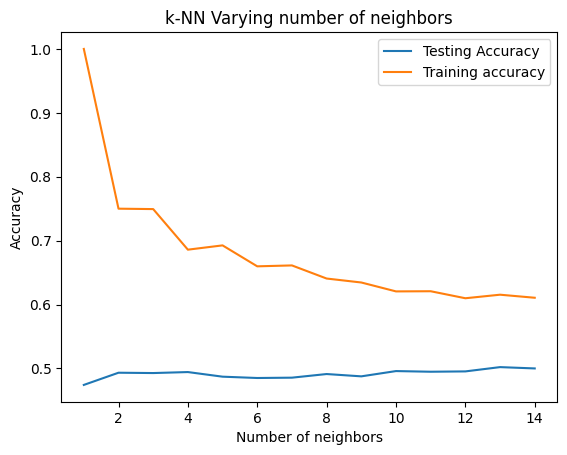

In [283]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [284]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,verbose=1,cv=6)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 6 folds for each of 49 candidates, totalling 294 fits
Best Score:0.5147161742922943
Best Parameters: {'n_neighbors': 15}


In [285]:
print('Training set score: {:.4f}'.format(knn_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_cv.score(X_test, y_test)))

Training set score: 0.6120
Test set score: 0.5088


In [286]:
y_pred = knn_cv.predict(X_test)

In [287]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[505, 457],
       [495, 481]], dtype=int64)

In [288]:
knn_accuracy = knn_cv.score(X_test, y_test)
knn_accuracy

0.5087719298245614

In [289]:
# precision
knn_pre = precision_score(y_test, y_pred)
knn_pre

0.5127931769722814

In [290]:
# recall
knn_rec = recall_score(y_test, y_pred)
knn_rec

0.492827868852459

Random Forests

In [291]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.5253


In [292]:
print('Training set score: {:.4f}'.format(rfc.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test_RF, y_test)))

Training set score: 0.9837
Test set score: 0.5253


In [293]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.5748


In [294]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 1.0000
Test set score: 0.5748


In [295]:
rfc_100.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

In [296]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [50,80,100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=9,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best params:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [297]:
clf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

In [298]:
y_pred = clf.predict(X_test_RF)

In [299]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.8170
Test set score: 0.5862


In [300]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,50))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

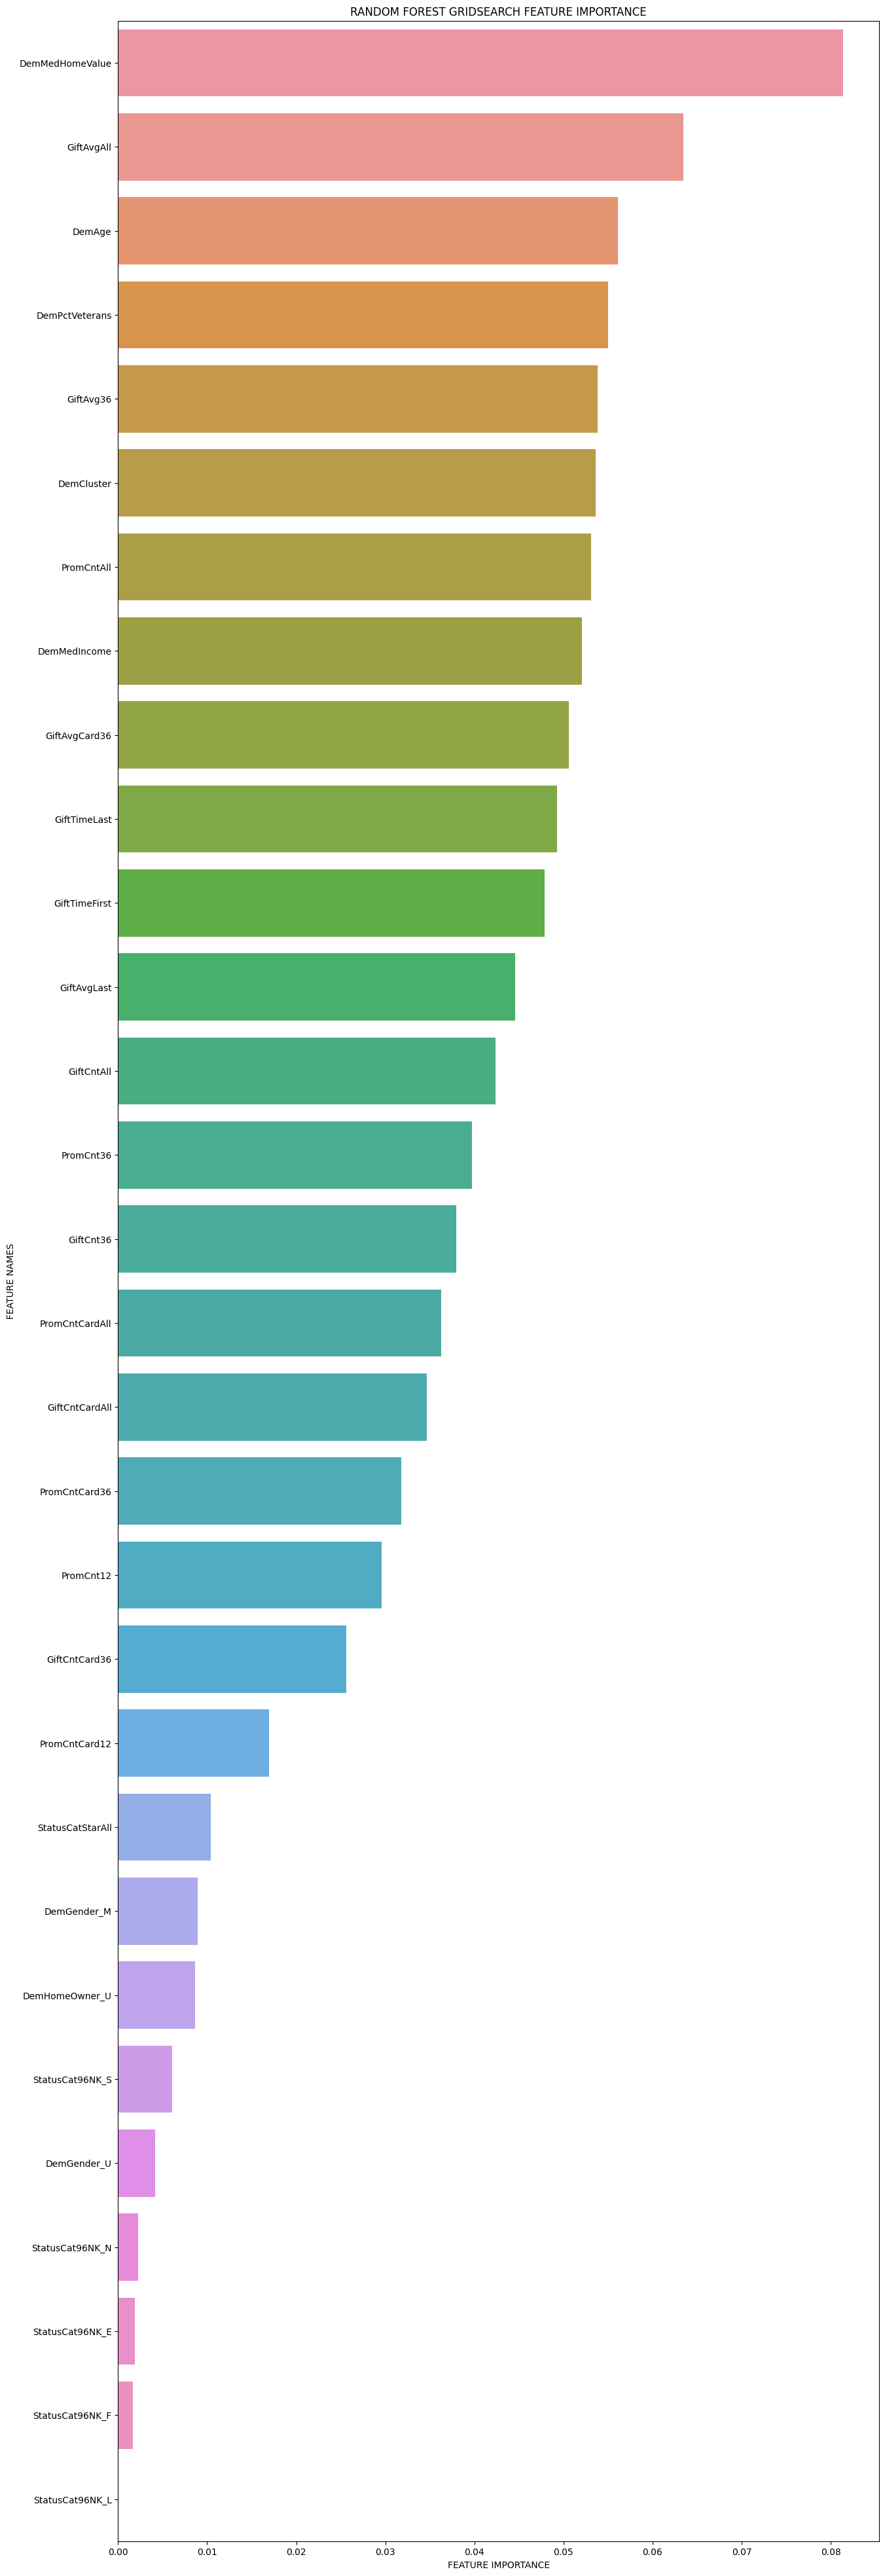

In [301]:
plot_feature_importance(clf.best_estimator_.feature_importances_,X_train_RF.columns,'RANDOM FOREST GRIDSEARCH ')

In [302]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[598, 364],
       [438, 538]], dtype=int64)

In [303]:
rfcv_accuracy = clf.score(X_test_RF, y_test)
rfcv_accuracy

0.586171310629515

In [304]:
# precision
rfcv_pre = precision_score(y_test, y_pred)
rfcv_pre

0.5964523281596452

In [305]:
# recall
rfcv_rec = recall_score(y_test, y_pred)
rfcv_rec

0.5512295081967213

ANN

In [306]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [307]:
Donor_model = Sequential()
Donor_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
Donor_model.add(Dense(512, activation = "relu"))
Donor_model.add(Dense(1024, activation = "relu"))
Donor_model.add(Dropout(0.2))
Donor_model.add(Dense(1024, activation = "relu"))
Donor_model.add(Dense(512, activation = "relu"))
Donor_model.add(Dense(256, activation = "relu"))
Donor_model.add(Flatten())
Donor_model.add(Dense(512, activation = "relu"))
Donor_model.add(Dropout(0.5))
Donor_model.add(Dense(512, activation = "relu"))
Donor_model.add(Dropout(0.5))
# Donor_model.add(Dense(1, activation = "sigmoid",kernel_regularizer = "binary_crossentropy"))
Donor_model.add(Dense(1, activation = "sigmoid"))
Donor_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [308]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
losses = tf.keras.losses.binary_crossentropy
Donor_model.compile(optimizer=optimizer, loss=losses, metrics=['accuracy'])

In [309]:
m_loss = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [310]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='donor_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [311]:
history=Donor_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=64, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


94/97 [============================>.] - ETA: 0s - loss: 0.6881 - accuracy: 0.5444
Epoch 1: val_accuracy improved from -inf to 0.52774, saving model to donor_model.h5
97/97 [==============================] - 3s 7ms/step - loss: 0.6880 - accuracy: 0.5447 - val_loss: 0.6889 - val_accuracy: 0.5277
Epoch 2/100
96/97 [============================>.] - ETA: 0s - loss: 0.6832 - accuracy: 0.5653
Epoch 2: val_accuracy improved from 0.52774 to 0.53355, saving model to donor_model.h5
97/97 [==============================] - 0s 5ms/step - loss: 0.6829 - accuracy: 0.5663 - val_loss: 0.6919 - val_accuracy: 0.5335
Epoch 3/100
94/97 [============================>.] - ETA: 0s - loss: 0.6797 - accuracy: 0.5735
Epoch 3: val_accuracy did not improve from 0.53355
97/97 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.5731 - val_loss: 0.6879 - val_accuracy: 0.5271
Epoch 4/100
94/97 [============================>.] - ETA: 0s - loss: 0.6795 - accuracy: 0.5678
Epoch 4: val_accuracy i

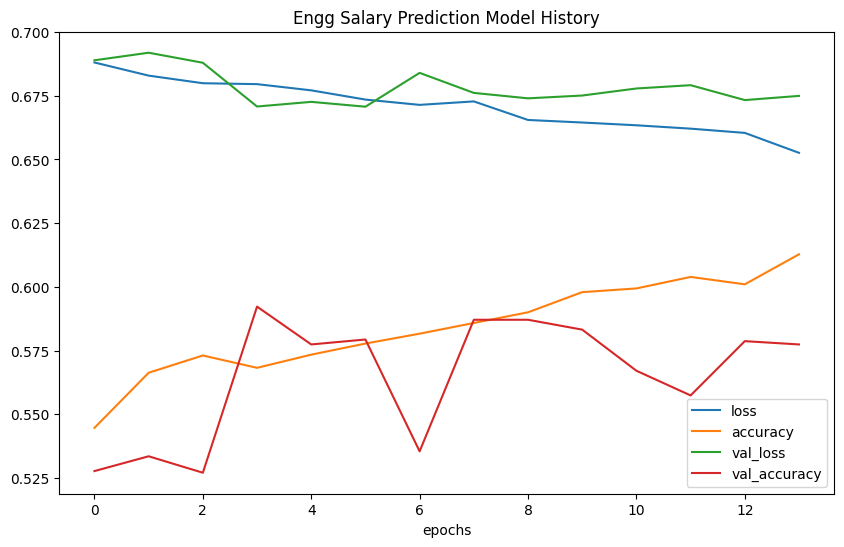

In [312]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Engg Salary Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [313]:
print("Evaluate Donor_model against trained data")
score = Donor_model.evaluate(X_train_RF, y_train, verbose=0)
print("score %s: %.2f%%" % (Donor_model.metrics_names[1], score[1]*100))

print("Evaluate Donor_model against test data")
score = Donor_model.evaluate(X_test_RF, y_test, verbose=0)
print("score %s: %.2f%%" % (Donor_model.metrics_names[1], score[1]*100))

Evaluate Donor_model against trained data
score accuracy: 58.42%
Evaluate Donor_model against test data
score accuracy: 56.76%


In [314]:
y_pred = Donor_model.predict(X_test_RF)

61/61 [==============================] - 0s 992us/step


In [315]:
# extract the predicted probabilities
p_pred = Donor_model.predict(X_test_RF)
p_pred = p_pred.flatten()
print(p_pred.round(2))

61/61 [==============================] - 0s 1ms/step
[0.55 0.47 0.52 ... 0.48 0.57 0.54]


In [316]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1 0 1 ... 0 1 1]


In [317]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[461, 501],
       [337, 639]], dtype=int64)

In [318]:
cnn_accuracy = accuracy_score(y_test,y_pred)
cnn_accuracy

0.5675954592363261

In [319]:
# precision
cnn_pre = precision_score(y_test, y_pred)
cnn_pre

0.5605263157894737

In [320]:
# recall
cnn_rec = recall_score(y_test, y_pred)
cnn_rec

0.6547131147540983

In [321]:
# creating performance dictionary
performance = {'Accuracy_Score':[cat_accuracy,ada_accuracy,lgb_accuracy,log_accuracy, knn_accuracy, rfcv_accuracy, cnn_accuracy],
              'Precision':[cat_pre,ada_pre,lgb_pre,log_pre,knn_pre, rfcv_pre, cnn_pre],
              'Recall': [cat_rec,ada_rec,lgb_rec,log_rec, knn_rec, rfcv_rec, cnn_rec]}

In [322]:
performance_df = pd.DataFrame(data = performance, index= ['CatBoostClassifier GridSearch','AdaBoostClassifier Gridsearch','LightGBM Classifier Gridsearch','Logistic Regression', 'KNeighbors', 
                                                             'RandomForest Gridsearch',
                                                                'ANN'])

In [323]:
performance_df

,Accuracy_Score,Precision,Recall
CatBoostClassifier GridSearch,0.593395,0.606576,0.548156
AdaBoostClassifier Gridsearch,0.601523,0.577387,0.538934
LightGBM Classifier Gridsearch,0.575851,0.584989,0.543033
Logistic Regression,0.582559,0.591457,0.553279
KNeighbors,0.508772,0.512793,0.492828
RandomForest Gridsearch,0.586171,0.596452,0.551230
ANN,0.567595,0.560526,0.654713
